In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
path = r'MLOps-private\data\raw\wine_quality_df.csv'
wine_quality_df = pd.read_csv(path, delimiter=',')

In [2]:
wine_quality_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df = wine_quality_df.set_index("quality")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [5]:
df.mean(axis = 0)

fixed_acidity             7.215307
volatile_acidity          0.339666
citric_acid               0.318633
residual_sugar            5.443235
chlorides                 0.056034
free_sulfur_dioxide      30.525319
total_sulfur_dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
dtype: float64

In [7]:
df.median(axis = 0)

fixed_acidity             7.00000
volatile_acidity          0.29000
citric_acid               0.31000
residual_sugar            3.00000
chlorides                 0.04700
free_sulfur_dioxide      29.00000
total_sulfur_dioxide    118.00000
density                   0.99489
pH                        3.21000
sulphates                 0.51000
alcohol                  10.30000
dtype: float64

In [8]:
df.mode(axis = 0)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,6.8,0.28,0.3,2.0,0.044,29.0,111.0,0.9972,3.16,0.5,9.5
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9976,NaN,NaN,NaN


# IQR

$$
IQR = Q_3 - Q_1
$$

In [9]:
IQR = df.fixed_acidity.quantile(0.75) - df.fixed_acidity.quantile(0.25)
print("IQR: ", IQR)

IQR:  1.2999999999999998


$$
lower = Q_1 - 1.5 * IQR
$$

$$
upper = Q_3 + 1.5 * IQR
$$

In [10]:
lower = df.fixed_acidity.quantile(0.25) - 1.5 * IQR
upper = df.fixed_acidity.quantile(0.75) + 1.5 * IQR

print(lower, upper)

4.450000000000001 9.65


In [12]:
outliers = df[(df['fixed_acidity'] < lower) | (df['fixed_acidity'] > upper)]

In [19]:
df.reset_index(inplace=True)
df['quality'] = df['quality'].astype('category')

df.head()

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


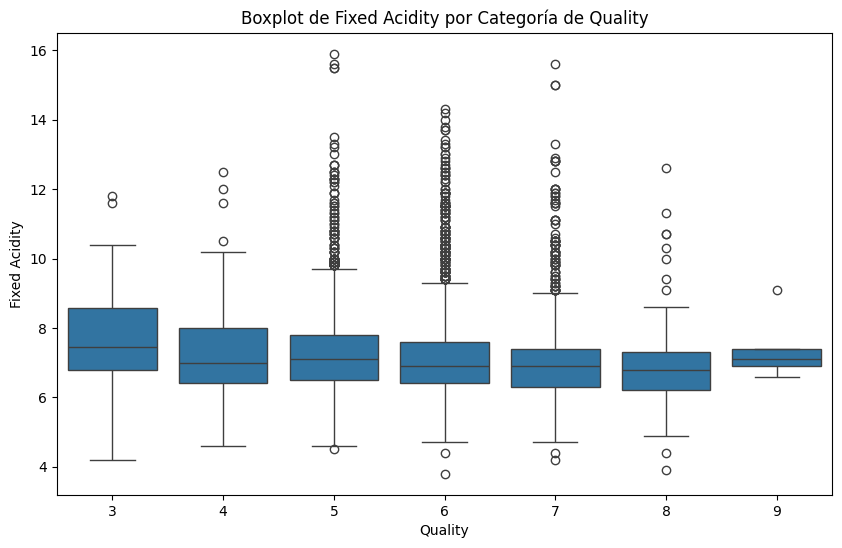

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='fixed_acidity', data=df)
plt.title('Boxplot de Fixed Acidity por Categoría de Quality')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

In [21]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


<Axes: ylabel='Frequency'>

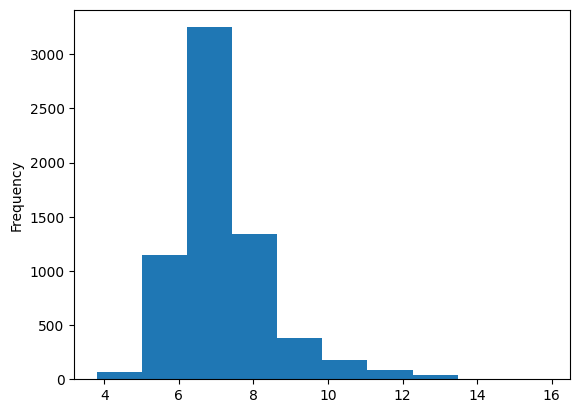

In [23]:
df.fixed_acidity.plot(kind = "hist")

In [24]:
df.fixed_acidity.skew()

1.7232896467669239

In [26]:
df.select_dtypes(include='number').skew()

fixed_acidity           1.723290
volatile_acidity        1.495097
citric_acid             0.471731
residual_sugar          1.435404
chlorides               5.399828
free_sulfur_dioxide     1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
dtype: float64

In [27]:
df.select_dtypes(include='number').kurt()

fixed_acidity            5.061161
volatile_acidity         2.825372
citric_acid              2.397239
residual_sugar           4.359272
chlorides               50.898051
free_sulfur_dioxide      7.906238
total_sulfur_dioxide    -0.371664
density                  6.606067
pH                       0.367657
sulphates                8.653699
alcohol                 -0.531687
dtype: float64